**Hand-in Group: g16**

*Students:* <br>
anderdav@students.zhaw.ch <br>
goodnic1@students.zhaw.ch <br>
janick.rueegger@students.fhnw.ch <br>
neyerjoh@students.zhaw.ch <br>

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

## Linear Regression

Using the rent prices from appartments in Lausanne from PW 02, restricting to the feature living area.

### Load Data

In [2]:
import pandas as pd
df = pd.read_csv("./lausanne-appart.csv")
N  = df.shape[0]
df.head()

,living_area,nb_rooms,rent_price
0,69,3.0,1810
1,95,3.5,2945
2,21,1.5,685
3,20,1.0,720
4,33,1.5,830


### Normalization

In [3]:
x0 = df.values[:,0]
x = (x0-np.mean(x0))/np.std(x0)
y0 = df.values[:,2]
y = (y0-np.mean(y0))/np.std(y0)

Text(0, 0.5, 'rent_price')

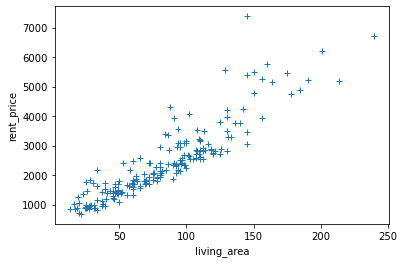

In [4]:
plt.plot(x0, y0,"+")
plt.xlabel("living_area")
plt.ylabel("rent_price")

Text(0, 0.5, 'rent_price')

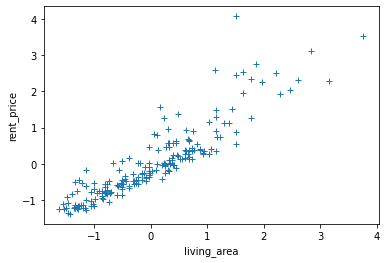

In [5]:
plt.plot(x, y,"+")
plt.xlabel("living_area")
plt.ylabel("rent_price")

### Linear Model, Normal Equations and Solution

We denote the observed rent by $y_j$ (at time $x_j$) and the model rent by $\hat{y}_j$ we assume 

$\qquad \hat{y}_j = \alpha + \beta x_j$

By minimizing the mean squares error

$\qquad C = \frac{1}{2N}\sum_j \left(y_j-\hat{y}_j\right)^2 = C(\alpha,\beta)$

we can fit the straigth line as follows by using the design matrix $X$ and the data vector $Y$, defined by 

$\qquad X = \left(\begin{array}{cc} 1 & x_0 \\ 1 & x_1 \\ \vdots & \vdots \\ 1 & x_{N-1}\end{array}\right), \qquad Y = \left(\begin{array}{c} y_0\\ \vdots \\ y_{N-1}\end{array}\right)$

We find 

$\qquad \left(\begin{array}{c}\alpha \\ \beta\end{array}\right) = \left(X^T\cdot X\right)^{-1}\cdot X^T\cdot Y$

Hence, here we can easily compute the (linear) model which best fits the training data in the sense of obtaining a minimal mean square error. 

### Solution of Normal Equations in Pytorch

*First solution: with numpy*

Shape(X):  (201, 2)
Shape(Y):  (201,)
a:  [240.07710727  26.33242457]


Text(0, 0.5, 'rent_price')

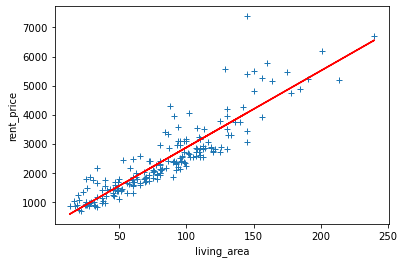

In [6]:
N = x.size

# YOUR CODE (START)
# compose torch tensors X,Y of shape (N,2) and (N,1) respectively
x1 = df.values[:,0]
x0 = np.ones(N)
X = np.array([x0, x1]).T
print("Shape(X): ", X.shape)
Y = df.values[:,2]
print("Shape(Y): ", Y.shape)

# solution of normal equations, 'a' a torch tensor of shape (2,1) that contains parameters alpha and beta, which shall be optimized
a = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)
print("a: ", a)

# prediction
Yhat = X.dot(a)

# YOUR CODE (END)

# plot
plt.plot(X[:,1],Y,"+")
plt.plot(X[:,1],Yhat,'r')
plt.xlabel("living_area")
plt.ylabel("rent_price")

*Second solution: with torch*

Shape(X):  torch.Size([201, 2])
Shape(Y):  torch.Size([201])
a:  tensor([240.0771,  26.3324], dtype=torch.float64)


Text(0, 0.5, 'rent_price')

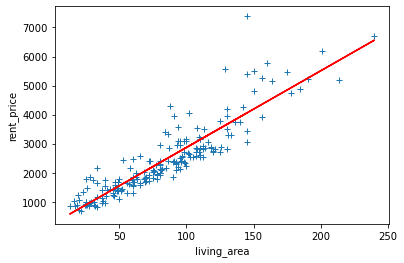

In [7]:
N = x.size

# YOUR CODE (START)
# compose torch tensors X,Y of shape (N,2) and (N,1) respectively
x1 = torch.tensor(df['living_area'], dtype=torch.float64)
x0 = torch.ones(N, dtype=torch.float64)

X = torch.stack([x0, x1], 1)
print("Shape(X): ", X.size())
Y = torch.tensor(df['rent_price'], dtype=torch.float64)
print("Shape(Y): ", Y.size())

# solution of normal equations, 'a' a torch tensor of shape (2,1) that contains parameters alpha and beta, which shall be optimized
a = torch.mv(
    torch.mm(
        torch.linalg.inv(
            torch.mm(
                torch.transpose(X, 0, 1), X
            )
        ), torch.transpose(X, 0, 1)
    ), Y
)
print("a: ", a)

# prediction
Yhat = torch.mv(X, a)

# YOUR CODE (END)

# plot
plt.plot(X[:,1],Y,"+")
plt.plot(X[:,1],Yhat,'r')
plt.xlabel("living_area")
plt.ylabel("rent_price")

Shape(X):  torch.Size([201, 2])
Shape(Y):  torch.Size([201, 1])
a:  tensor([[-1.9602e-16],
        [ 9.0425e-01]], dtype=torch.float64)


Text(0, 0.5, 'rent_price')

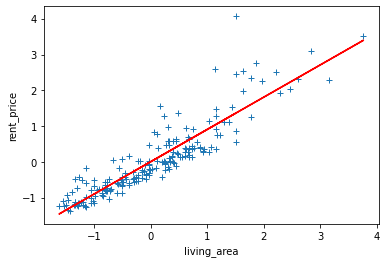

In [8]:
N = x.size

# YOUR CODE (START)
# compose torch tensors X,Y of shape (N,2) and (N,1) respectively
X = torch.column_stack([torch.ones(N), torch.tensor(x)])
Y = torch.tensor(y.reshape(-1,1))

print("Shape(X): ", X.size())
print("Shape(Y): ", Y.size())

# solution of normal equations, 'a' a torch tensor of shape (2,1) that contains parameters alpha and beta, which shall be optimized
a = torch.inverse(X.T @ X) @ X.T @ Y
print("a: ", a)

# prediction
Yhat  = X @ a

# YOUR CODE (END)

# plot
plt.plot(X[:,1],Y,"+")
plt.plot(X[:,1],Yhat,'r')
plt.xlabel("living_area")
plt.ylabel("rent_price")

Note that with the pytorch function `torch.lstsq` you can obtain the same.

a:  tensor([[-6.2193e-17],
        [ 9.0425e-01]], dtype=torch.float64)


Text(0, 0.5, 'rent_price')

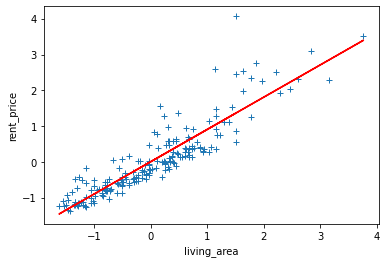

In [9]:
# lstsq function
a = torch.linalg.lstsq(X,Y).solution
print("a: ", a)

# prediction
Yhat  = X @ a

# plot
plt.plot(X[:,1],Y,"+")
plt.plot(X[:,1],Yhat,'r')
plt.xlabel("living_area")
plt.ylabel("rent_price")

**Loss**

In [10]:
# sample mean square error (SMSE)
def loss(Y, Yhat):
    return (1 / 2) * (Y - Yhat)**2

#### Cost

In [11]:
def cost(X,Y,a):
    # YOUR CODE (START)
    Yhat = X @ a
    N = Y.shape[0]
    cost = (1 / N) * torch.sum(loss(Y, Yhat))
    return cost.item()
    # YOUR CODE (END)

In [12]:
# a is given by the above solution, thus, already optimized
# cost_closed_form is used in the last figure
cost_closed_form = cost(X,Y,a)
print(cost_closed_form)

0.09116652939581012


### Gradient Descent

Specify the gradient of the cost (w.r.t. $\alpha, \beta$) here as maths expression.

$$\nabla C(\alpha, \beta) =
\begin{pmatrix}
\frac{\partial C}{\partial\alpha}\\
\frac{\partial C}{\partial\beta}
\end{pmatrix}
$$

$$C(\alpha,\beta) = \frac{1}{2N}\sum_j \left(y_j-\hat{y}_j\right)^2$$

$$\qquad Given \rightarrow \hat{y}_j = \alpha + \beta x_j$$

$$\implies C(\alpha,\beta) = \frac{1}{2N}\sum_j \left(y_j-(\alpha + \beta x_j)\right)^2$$

$$\frac{\partial C}{\partial\alpha} = \frac{1}{2N}\sum_j -2 (y_j - \hat y_j)$$
$$\frac{\partial C}{\partial\beta} = \frac{1}{2N}\sum_j -2 x_j (y_j - \hat y_j)$$

$$a = \begin{pmatrix}\alpha\\\beta \end{pmatrix}$$

In [13]:
def gradient_cost(X, Y, a):
    # YOUR CODE (START)
    N = Y.shape[0]
    Yhat = X @ a
    return 1/N * torch.tensor([
        [-torch.sum(Y - Yhat)],
        [-torch.sum(X[:,[1]] * (Y - Yhat))],
    ], dtype=torch.float64)
    # YOUR CODE (END)

**Update**

$$\theta^{(t+1)}=\theta^{(t)}-a \; \nabla C(\theta^{(t)})$$

a:  tensor([[-9.5081e-17],
        [ 8.6125e-01]], dtype=torch.float64)


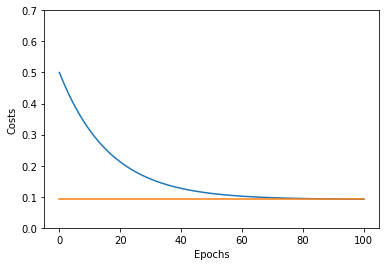

In [14]:
# adjust if needed
nepochs = 100
lr = 0.03

## initial parameter
a = torch.tensor([0.0,0.0], dtype=torch.float64).reshape(2,1)

# track the costs
costs = [cost(X,Y,a)]

# YOUR CODE (START)

# loop over the epochs: update parameter values, compute the cost and add it to the costs list
for epoch in range(nepochs):
    a = a - lr * gradient_cost(X, Y, a)
    costs.append(cost(X,Y,a))

# YOUR CODE (END)
    
# some output
cost_gd = costs[-1]
plt.xlabel("Epochs")
plt.ylabel("Costs")
plt.plot(range(nepochs+1),costs)
plt.plot(range(nepochs+1),cost_closed_form*torch.ones(nepochs+1))
plt.ylim(0,.7)

print("a: ", a)

### Different Learning Rates

Play with different learning rates: Explore for what learning rates 
- the learning is most efficient
- the learning yet works
- the learning does not work anymore (learning rate too large)

Explain the different scenarios.

a:  tensor([[-1.2373e-16],
        [ 9.0425e-01]], dtype=torch.float64)


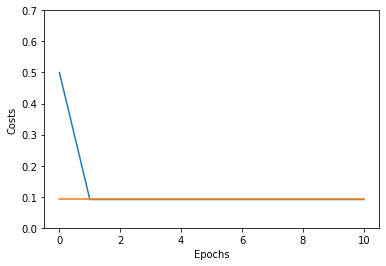

In [15]:
# adjust if needed
nepochs = 10
lr = 1

## initial parameter
a = torch.tensor([0.0,0.0], dtype=torch.float64).reshape(2,1)

# track the costs
costs = [cost(X,Y,a)]

# YOUR CODE (START)

# loop over the epochs: update parameter values, compute the cost and add it to the costs list
for epoch in range(nepochs):
    a = a - lr * gradient_cost(X, Y, a)
    costs.append(cost(X,Y,a))

# YOUR CODE (END)
    
# some output
cost_gd = costs[-1]
plt.xlabel("Epochs")
plt.ylabel("Costs")
plt.plot(range(nepochs+1),costs)
plt.plot(range(nepochs+1),cost_closed_form*torch.ones(nepochs+1))
plt.ylim(0,.7)

print("a: ", a)

In [16]:
def plot(nepochs, lrs):
    # track the costs
    all_costs = []

    # YOUR CODE (START)

    # loop over the lrs
    for lr in lrs:
        a = torch.tensor([0.0, 0.0], dtype=torch.float64).reshape(2,1)
        costs = [cost(X,Y,a)]

        # loop over the epochs: update parameter values, compute the cost and add it to the costs list
        for epoch in range(nepochs):
            a = a - lr * gradient_cost(X, Y, a)
            costs.append(cost(X,Y,a))

        all_costs.append(costs)

    # YOUR CODE (END)

    # some output
    cost_gd = costs[-1]
    plt.xlabel("Epochs")
    plt.ylabel("Costs")

    plt.plot(range(nepochs+1),cost_closed_form*torch.ones(nepochs+1))

    for i, c in enumerate(all_costs): 
        line = plt.plot(range(nepochs+1), c, label=lrs[i])
    plt.legend()

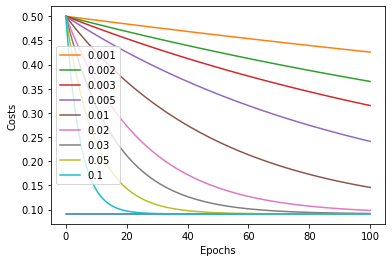

In [17]:
nepochs = 100
lrs = [0.001, 0.002, 0.003, 0.005, 0.01, 0.02, 0.03, 0.05, 0.1]

plot(nepochs, lrs)

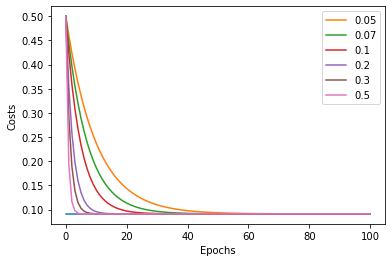

In [18]:
nepochs = 100
lrs = [0.05, 0.07, 0.1, 0.2, 0.3, 0.5]

plot(nepochs, lrs)

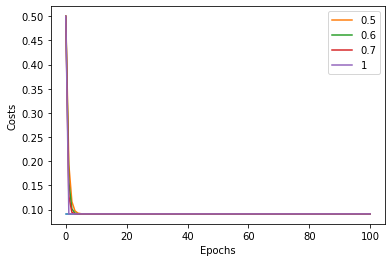

In [19]:
nepochs = 100
lrs = [0.5, 0.6, 0.7, 1]

plot(nepochs, lrs)

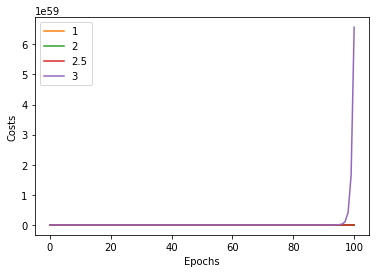

In [20]:
nepochs = 100
lrs = [1, 2, 2.5, 3]

plot(nepochs, lrs)

$0.03 > lr:\;$ works and finds a solution, but not optimal + the learning steps are too small, so also slow conversion <br>
$0.03 <= lr <= 2.5:\;$ finds an optimal solution <br>
$1 = lr:\;$ finds the optimal solution in just one epoch <br>
$2.5 < lr:\;$ overshoots and does not find the optimal solution